In [1]:
import pandas as pd
import numpy as np
import logging
import os

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from galaxy_datasets.pytorch.galaxy_datamodule import GalaxyDataModule

GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping


In [4]:
from zoobot.pytorch.training import finetune

In [5]:
from galaxy_datasets import gz2,gz_decals_5  # or gz_hubble, gz_candels, ...

gzd5_catalog_train, _ = gz_decals_5(
    root='data/gzd5',
    train=True,
    download=False
)

gzd5_catalog_test, _ = gz_decals_5(
    root='data/gzd5',
    train=True,
    download=False
)



In [6]:
gzd5_catalog = pd.concat([gzd5_catalog_train,gzd5_catalog_test])
gzd5_rings = pd.read_csv('data/target-mining/gzd5_rings.csv')
gzd5_not_rings = gzd5_catalog[~gzd5_catalog.file_loc.isin(gzd5_rings.file_loc_x.to_list())]

ring_part = gzd5_rings[['file_loc_x']]
ring_part.columns = ['file_loc']
ring_part['ring'] = 1

not_ring_part = gzd5_not_rings.sample(ring_part.shape[0])[['file_loc']]
not_ring_part['ring'] = 0
not_ring_part

gzd5_catalog = pd.concat([ring_part,not_ring_part]).reset_index(names=['id_str'])
label_cols = ['ring']
gzd5_catalog_train, gzd5_catalog_test = train_test_split(gzd5_catalog, stratify = gzd5_catalog.ring)

In [7]:
logging.basicConfig(level=logging.INFO)

zoobot_dir = 'zoobot'

checkpoint_loc = 'data/pretrained_models/effnetb0_greyscale_224px.ckpt'

save_dir = 'results/pytorch/finetune/finetune_binary_classification'

datamodule = GalaxyDataModule(
      label_cols=label_cols,
      catalog=gzd5_catalog_train,
      batch_size=32
    )

model = finetune.FinetuneableZoobotClassifier(
      checkpoint_loc=checkpoint_loc,
      num_classes=2,
      n_layers=0  # only updating the head weights. Set e.g. 1, 2 to finetune deeper. 
    )

trainer = finetune.get_trainer(save_dir, accelerator='cpu', max_epochs=10,log_every_n_steps = 5)
trainer.fit(model, datamodule)


INFO:root:Num workers: 4
INFO:root:Prefetch factor: 4
INFO:root:Using albumentations for augmentations
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /var/folders/8m/fpt3kb2n0ys89v3nl34fszrd2jtv8f/T/tmp6myowfs5
INFO:torch.distributed.nn.jit.instantiator:Writing /var/folders/8m/fpt3kb2n0ys89v3nl34fszrd2jtv8f/T/tmp6myowfs5/_remote_module_non_scriptable.py
INFO:root:Generic __init__ complete - moving to Zoobot __init__
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
INFO:root:encoder dim: 1280
INFO:root:Using test-time dropout
INFO:root:Zoobot __init__ complete
INFO:root:Layers to finetune: 0
INFO:root:always_train_batchnorm=True, so all batch norm layers will be finetuned
INFO:root:Using classification head and cross-entropy loss
INFO:root:num_classes: 2
INFO:root:Using binary classification
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0

Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Epoch 0, global step 41: 'finetuning/val_loss' reached 0.65599 (best 0.65599), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/0.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 1, global step 82: 'finetuning/val_loss' reached 0.61432 (best 0.61432), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/1-v1.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 2, global step 123: 'finetuning/val_loss' reached 0.57994 (best 0.57994), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/2.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 3, global step 164: 'finetuning/val_loss' reached 0.54728 (best 0.54728), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/3.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 4, global step 205: 'finetuning/val_loss' reached 0.52222 (best 0.52222), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/4.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 5, global step 246: 'finetuning/val_loss' reached 0.49223 (best 0.49223), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/5.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 6, global step 287: 'finetuning/val_loss' reached 0.47080 (best 0.47080), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/6.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 7, global step 328: 'finetuning/val_loss' reached 0.45197 (best 0.45197), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/7.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 8, global step 369: 'finetuning/val_loss' reached 0.43227 (best 0.43227), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/8.ckpt' as top 1


Validation: |                                                                                                 …

Epoch 9, global step 410: 'finetuning/val_loss' reached 0.42091 (best 0.42091), saving model to '/Users/andrey-shan/hse-mlds/ring_galaxies/results/pytorch/finetune/finetune_binary_classification/checkpoints/9-v1.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=10` reached.


GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping


In [24]:
best_checkpoint = trainer.checkpoint_callback.best_model_path
finetuned_model = finetune.FinetuneableZoobotClassifier.load_from_checkpoint(best_checkpoint)
save_dir = 'results/pytorch/finetune/finetune_binary_classification'

from zoobot.pytorch.predictions import predict_on_catalog

predict_on_catalog.predict(
      gzd5_catalog_test,
      finetuned_model,
      n_samples=1,
      label_cols=['not_ring', 'ring'],
      save_loc=os.path.join(save_dir, 'finetuned_predictions_test.csv'),
      datamodule_kwargs={'batch_size': 32},  # we also need to set batch size here, or you may run out of memory
      trainer_kwargs={'accelerator': 'cpu'}  
    )

INFO:root:Generic __init__ complete - moving to Zoobot __init__
INFO:root:encoder dim: 1280
INFO:root:Using test-time dropout
INFO:root:Zoobot __init__ complete
INFO:root:Layers to finetune: 0
INFO:root:always_train_batchnorm=True, so all batch norm layers will be finetuned
INFO:root:Using classification head and cross-entropy loss
INFO:root:num_classes: 2
INFO:root:Using binary classification
INFO:root:Num workers: 4
INFO:root:Prefetch factor: 4
INFO:root:Using albumentations for augmentations
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:Beginning predictions
INFO:root:Starting at: 2024-03-27 21:46:02


Predicting: |                                                                                                 …

GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping


INFO:root:Predictions complete - (620, 2, 1)
INFO:root:Saving predictions to results/pytorch/finetune/finetune_binary_classification/finetuned_predictions_test.csv
INFO:root:Predictions saved to results/pytorch/finetune/finetune_binary_classification/finetuned_predictions_test.csv
INFO:root:Completed at: 2024-03-27 21:47:50
INFO:root:Time elapsed: 0:01:47.735514


In [29]:
predictions = pd.read_csv(os.path.join(save_dir, 'finetuned_predictions_test.csv'))


In [32]:
predictions = pd.merge(predictions, gzd5_catalog_test[['id_str', 'file_loc', 'ring']])
predictions.head()

id_str  not_ring_pred  ring_pred  \
0   61046       0.712744   0.287256   
1     240       0.318035   0.681965   
2   83773       0.597669   0.402331   
3     750       0.257817   0.742183   
4  181821       0.721508   0.278492   

                                        file_loc  ring  
0  data/gzd5/images/J114/J114719.15+101424.6.jpg     0  
1  data/gzd5/images/J143/J143311.63+020129.7.jpg     1  
2  data/gzd5/images/J121/J121206.00+133353.8.jpg     0  
3  data/gzd5/images/J140/J140119.71+215145.2.jpg     1  
4  data/gzd5/images/J140/J140837.83-001330.4.jpg     0

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_rings(df):
  # little utility function to visualise galaxies and our ring labels/predictions

  fig, axes = plt.subplots(ncols=5, figsize=(16, 3))
  for n in range(5):
    galaxy = df.iloc[n]

    im = Image.open(galaxy['file_loc'])
    axes[n].imshow(im)

    correct = np.around(galaxy['ring_pred']) == galaxy['ring']
    if correct:
      color = 'g'
    else:
      color = 'r'
    axes[n].text(20, 50, 'Pred: {:.2f}'.format(galaxy['ring_pred']), color=color)
    axes[n].text(20, 90, 'Label: {}'.format(galaxy['ring']), color=color)

    axes[n].axis('off')
      

443         7
392       978
524       737
56       1140
590       413
        ...  
38      16169
581     64791
393    134688
511    145138
143    124772
Name: id_str, Length: 620, dtype: int64


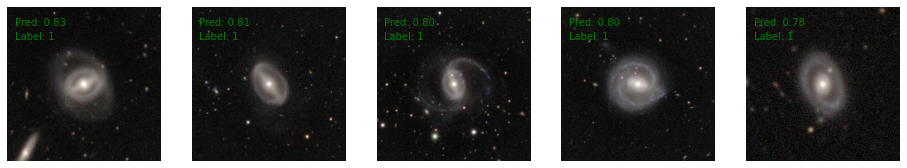

In [34]:
top_5_predictions = predictions.sort_values('ring_pred', ascending=False)
show_rings(top_5_predictions)
print(top_5_predictions['id_str'])

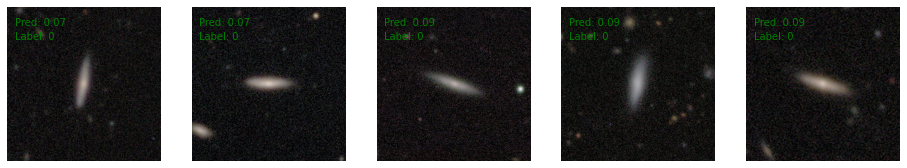

In [35]:
bottom_5_predictions = predictions.sort_values('ring_pred', ascending=True)
show_rings(bottom_5_predictions)

285    31162
160      822
352     1050
194      590
111      607
Name: id_str, dtype: int64


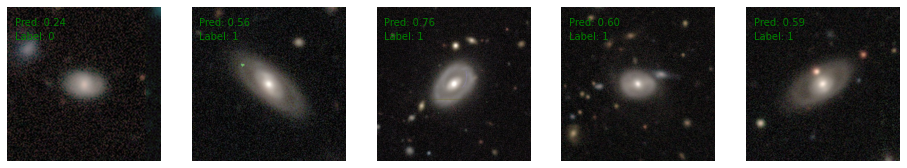

In [36]:
random_predictions = predictions.sample(5)
print(random_predictions['id_str'])
show_rings(random_predictions)

In [39]:
from sklearn.metrics import roc_auc_score
print('roc_auc: ',roc_auc_score(predictions.ring, predictions.ring_pred))

roc_auc:  0.9564724245577523


In [41]:
pred_labels =  (predictions.ring_pred > 0.5)

print('acc: ',(pred_labels == predictions.ring).sum() / predictions.shape[0])

acc:  0.896774193548387


In [42]:
gzd5_not_rings_sample = gzd5_not_rings.sample(10000)[['iauname','file_loc']].reset_index(names=['id_str'])
gzd5_not_rings_sample.head()

id_str              iauname                                       file_loc
0  166760  J152144.14+255759.5  data/gzd5/images/J152/J152144.14+255759.5.jpg
1  144524  J124526.91+010008.4  data/gzd5/images/J124/J124526.91+010008.4.jpg
2  122542  J005356.70+114547.0  data/gzd5/images/J005/J005356.70+114547.0.jpg
3   33497  J110405.81+280014.6  data/gzd5/images/J110/J110405.81+280014.6.jpg
4   96227  J134258.69-033055.0  data/gzd5/images/J134/J134258.69-033055.0.jpg

In [43]:
predict_on_catalog.predict(
      gzd5_not_rings_sample,
      finetuned_model,
      n_samples=1,
      label_cols=['not_ring', 'ring'],
      save_loc=os.path.join(save_dir, 'finetuned_predictions_gzd5_sample.csv'),
      datamodule_kwargs={'batch_size': 32},  # we also need to set batch size here, or you may run out of memory
      trainer_kwargs={'accelerator': 'cpu'}  
    )

INFO:root:Num workers: 4
INFO:root:Prefetch factor: 4
INFO:root:Using albumentations for augmentations
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:Beginning predictions
INFO:root:Starting at: 2024-03-27 21:54:30


Predicting: |                                                                                                 …

GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping


INFO:root:Predictions complete - (10000, 2, 1)
INFO:root:Saving predictions to results/pytorch/finetune/finetune_binary_classification/finetuned_predictions_gzd5_sample.csv
INFO:root:Predictions saved to results/pytorch/finetune/finetune_binary_classification/finetuned_predictions_gzd5_sample.csv
INFO:root:Completed at: 2024-03-27 22:06:37
INFO:root:Time elapsed: 0:12:06.761978


In [63]:
predictions = pd.read_csv(os.path.join(save_dir, 'finetuned_predictions_gzd5_sample.csv'))
predictions.id_str = predictions.id_str.astype(int)

predictions = pd.merge(predictions, gzd5_not_rings_sample[['id_str', 'file_loc', 'iauname']])
predictions.head()

id_str  not_ring_pred  ring_pred  \
0  166760       0.719615   0.280386   
1  144524       0.405847   0.594153   
2  122542       0.443265   0.556735   
3   33497       0.601092   0.398908   
4   96227       0.692856   0.307144   

                                        file_loc              iauname  
0  data/gzd5/images/J152/J152144.14+255759.5.jpg  J152144.14+255759.5  
1  data/gzd5/images/J124/J124526.91+010008.4.jpg  J124526.91+010008.4  
2  data/gzd5/images/J005/J005356.70+114547.0.jpg  J005356.70+114547.0  
3  data/gzd5/images/J110/J110405.81+280014.6.jpg  J110405.81+280014.6  
4  data/gzd5/images/J134/J134258.69-033055.0.jpg  J134258.69-033055.0

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_rings_2(df):
  # little utility function to visualise galaxies and our ring labels/predictions

  fig, axes = plt.subplots(ncols=5,nrows = 5, figsize=(16, 16))
  for i in range(5):
        for j in range(5):
            galaxy = df.iloc[i*5+j]
            
            im = Image.open(galaxy['file_loc'])
            axes[i,j].imshow(im)
            
            axes[i,j].text(20, 50, 'Pred: {:.2f}'.format(galaxy['ring_pred']), color='g')
            axes[i,j].set_title(galaxy['iauname'])
            axes[i,j].axis('off')
                     

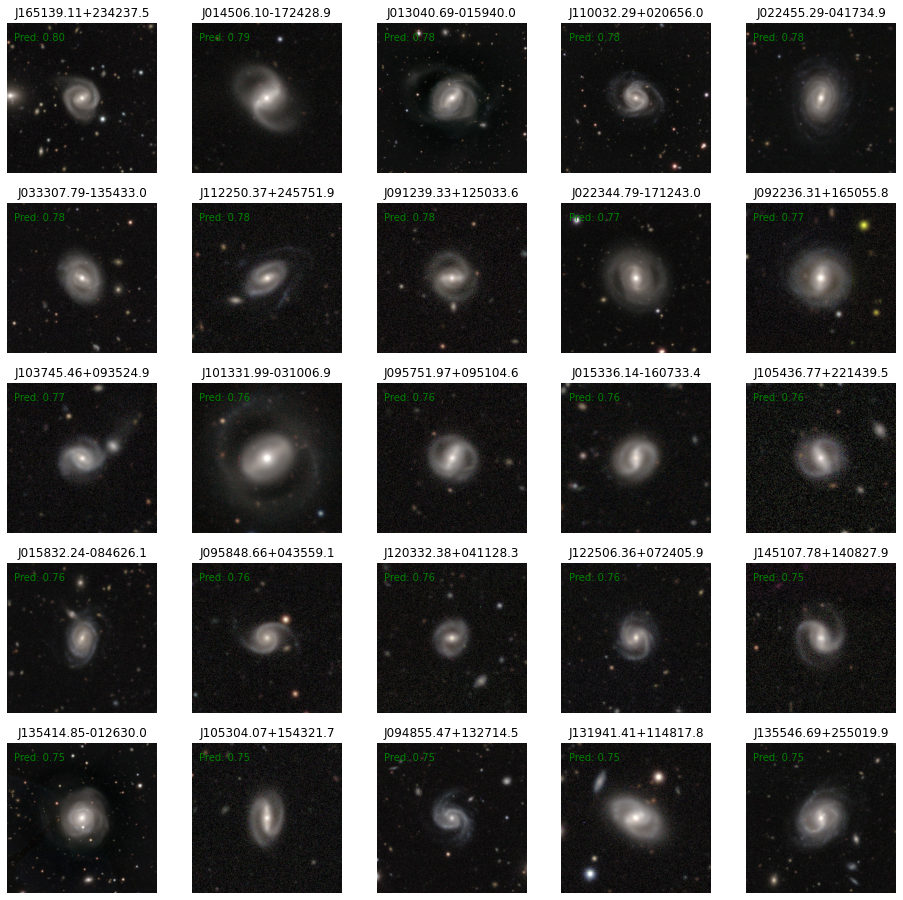

In [73]:
top_25_predictions = predictions.sort_values('ring_pred', ascending=False)
show_rings_2(top_25_predictions)


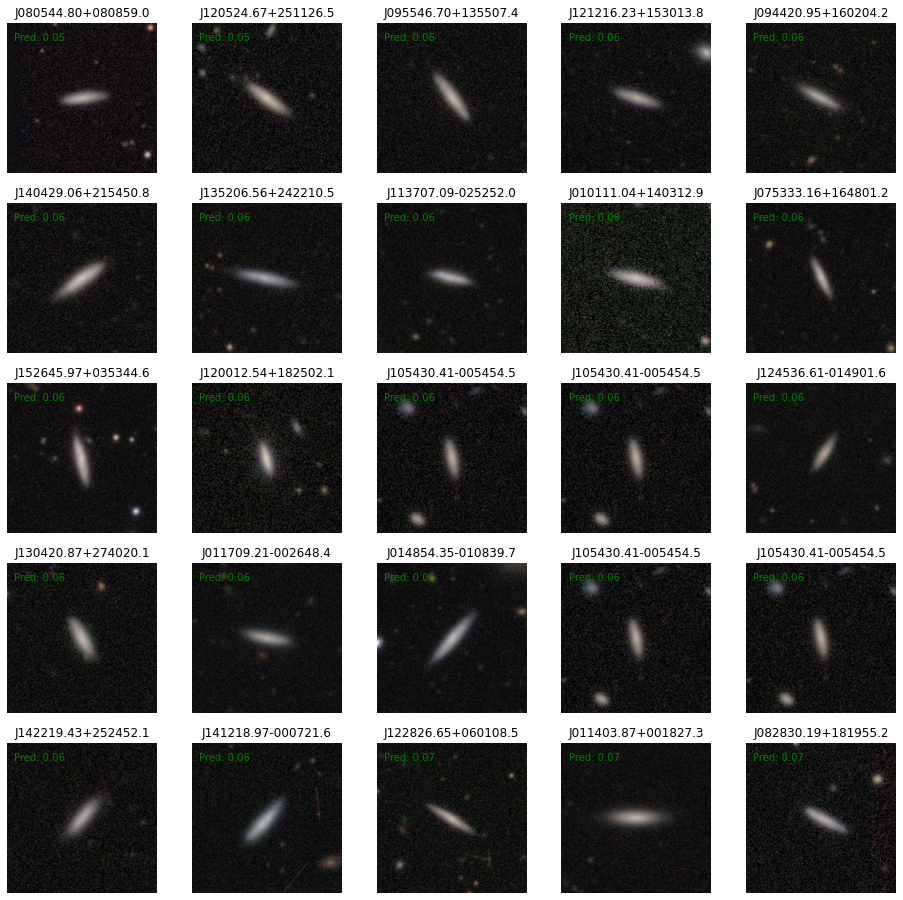

In [77]:
bottom_25_predictions = predictions.sort_values('ring_pred', ascending=True)
show_rings_2(bottom_25_predictions)

In [78]:
random_predictions = predictions.sample(25)
show_rings_2(random_predictions)

In [79]:
gzd5_rings

iauname     upload_group  active_learning_on  in_gzd_ab  \
0     J160512.05+321018.3  active_baseline               False      False   
1     J150440.21+003616.2       pre_active               False      False   
2     J133931.12-010329.2       pre_active               False      False   
3     J091417.69+221631.4  active_priority                True      False   
4     J124706.58+172447.9  active_baseline               False      False   
...                   ...              ...                 ...        ...   
1234  J122640.87+250709.7  active_baseline               False      False   
1235  J144107.38+241528.0  active_baseline               False      False   
1236  J100029.65+162104.4  active_baseline               False      False   
1237  J150553.80-014350.6       pre_active               False      False   
1238  J112014.86+194553.1  active_priority                True      False   

                               png_loc  smooth-or-featured-dr5_total-votes  \
0     dr5/J160/J160512.05+321018.3.png                                   5   
1     dr5/J150/J150440.21+003616.2.png                                  35   
2     dr5/J133/J133931.12-010329.2.png                                  36   
3     dr5/J091/J091417.69+221631.4.png                                  47   
4     dr5/J124/J124706.58+172447.9.png                                   3   
...                                ...                                 ...   
1234  dr5/J122/J122640.87+250709.7.png                                   5   
1235  dr5/J144/J144107.38+241528.0.png                                   5   
1236  dr5/J100/J100029.65+162104.4.png                                   4   
1237  dr5/J150/J150553.80-014350.6.png                                  40   
1238  dr5/J112/J112014.86+194553.1.png                                  50   

      smooth-or-featured-dr5_smooth  smooth-or-featured-dr5_smooth_fraction  \
0                               2.0                                0.400000   
1                               9.0                                0.257143   
2                              15.0                                0.416667   
3                              10.0                                0.212766   
4                               1.0                                0.333333   
...                             ...                                     ...   
1234                            1.0                                0.200000   
1235                            2.0                                0.400000   
1236                            0.0                                0.000000   
1237                            6.0                                0.150000   
1238                            9.0                                0.180000   

      smooth-or-featured-dr5_featured-or-disk  \
0                                         3.0   
1                                        24.0   
2                                        20.0   
3                                        34.0   
4                                         2.0   
...                                       ...   
1234                                      3.0   
1235                                      2.0   
1236                                      3.0   
1237                                     34.0   
1238                                     37.0   

      smooth-or-featured-dr5_featured-or-disk_fraction  \
0                                             0.600000   
1                                             0.685714   
2                                             0.555556   
3                                             0.723404   
4                                             0.666667   
...                                                ...   
1234                                          0.600000   
1235                                          0.400000   
1236                                          0.750000   
1237                                  